In [1]:
#NEW ATTEMPT Below 

In [1]:
# Load data
import pandas as pd
df = pd.read_csv('../Data/jul_labelled.csv')

In [2]:
import spacy
from spacy import tokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords
import re
import nltk
from nltk.corpus import wordnet
from nltk.stem.porter import PorterStemmer

# Load the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Load spacy object
nlp = spacy.load('en_core_web_sm')

# Preprocess the tweets
stop_words = set(stopwords.words('english'))

def clean_tweet(tweet):
    if type(tweet) == float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = re.sub("amber","", temp)
    temp = re.sub("amp","", temp)
    temp = re.sub("heard","", temp)
    temp = re.sub("johnny","", temp)
    temp = re.sub("depp","", temp)
    temp = re.sub("ah","", temp)
    temp = re.sub("jd","", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stop_words]
    temp = " ".join(word for word in temp)
    return temp

def tokenize(tweet):
    doc = nlp(tweet)
    return [token.text for token in doc if not token.is_stop and not token.is_punct]

df['cleaned_text'] = df['full_text'].apply(clean_tweet)
df['tokens'] = df['cleaned_text'].apply(tokenize)

# Add a new column to the DataFrame with the sentiment score for each tweet
df['sentiment_score'] = df['full_text'].apply(lambda tweet: sia.polarity_scores(tweet)['compound'])


In [4]:
df.head()

,Unnamed: 0,created_at,id_str,user_name,user_id,in_reply_to_status_id_str,in_reply_to_username,like_count,full_text,Johnny Depp sentiment,Amber Heard sentiment,cleaned_text,tokens,sentiment_score
0,0,2022-07-10 23:59:48+00:00,1.546283e+18,reenpur78,1.487474e+18,1.546183e+18,sbebme,0,@sbebme @JadaSchwitz Did u step on a bee again...,not mentioned,not mentioned,did u step on a bee again ma am is the abus...,"[ , u, step, bee, , abuser, ]",0.0000
1,1,2022-07-10 23:59:39+00:00,1.546283e+18,KevinSipos2,1.438766e+18,1.546282e+18,grannydryden1,0,@grannydryden1 @Jar81Jar @laura_auerbach @Patr...,not mentioned,positive,well i doubt any victim would support,"[ , doubt, victim, support, ]",0.0516
2,2,2022-07-10 23:58:03+00:00,1.546283e+18,S_7_3_V_3,1.516902e+18,1.546281e+18,FoxNews,0,@FoxNews She's got an Amber Heard look about her!,not mentioned,neutral,shes got an look about her,"[ , got, , look]",0.0000
3,3,2022-07-10 23:57:21+00:00,1.546282e+18,Daniboy_CFC,2.596980e+08,NaN,NaN,0,Johnny Depp Releases New Music Which Seemingly...,neutral,not mentioned,releases new music which seemingly bashes,"[ , releases, new, music, seemingly, bashes, ]",0.0000
4,4,2022-07-10 23:57:07+00:00,1.546282e+18,9breakingn,1.514196e+18,NaN,NaN,0,Johnny Depp seemingly lashes out at ex-wife Am...,negative,negative,seemingly lashes out at ex wife on two dev...,"[ , seemingly, lashes, ex, wife, , devastat...",-0.6486


Number of Johnny Depp positive tweets: 5861
Number of Johnny Depp negative tweets: 7563
Number of Amber Heard positive tweets: 20572
Number of Amber Heard negative tweets: 28554

Percentage of Johnny Depp positive tweets: 7.79 %
Percentage of Johnny Depp negative tweets: 10.06 %
Percentage of Amber Heard positive tweets: 27.36 %
Percentage of Amber Heard negative tweets: 37.98 %


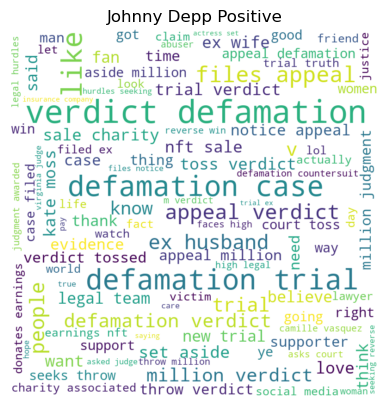

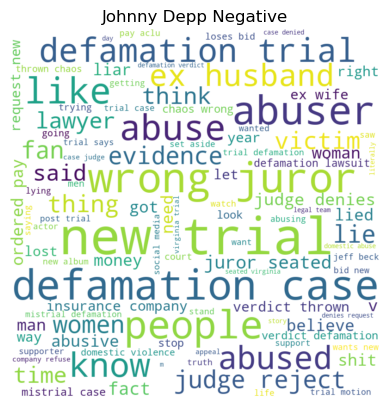

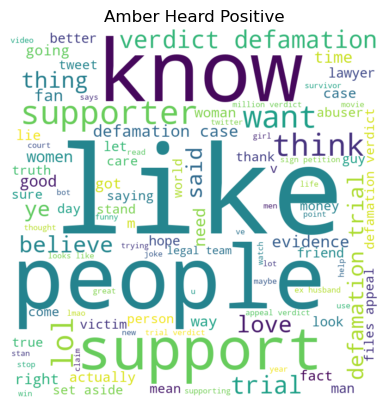

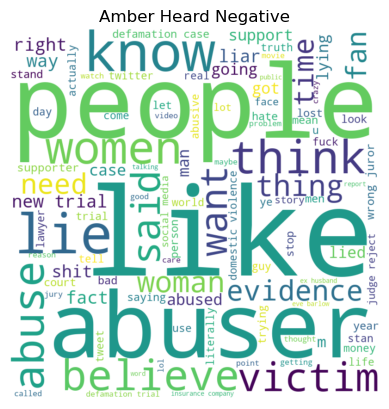

In [3]:
# Create three new DataFrames from the original DataFrame, one for each sentiment category (positive, negative, neutral)
df_jd_pos = df[(df['sentiment_score'] > 0) & (df['Johnny Depp sentiment'] == 'positive')]
df_jd_neg = df[(df['sentiment_score'] < 0) & (df['Johnny Depp sentiment'] == 'negative')]
# df_jd_neu = df[(df['sentiment_score'] == 0) & (df['Johnny Depp sentiment'] == 'neutral')]
df_ah_pos = df[(df['sentiment_score'] > 0) & (df['Amber Heard sentiment'] == 'positive')]
df_ah_neg = df[(df['sentiment_score'] < 0) & (df['Amber Heard sentiment'] == 'negative')]
# df_ah_neu = df[(df['sentiment_score'] == 0) & (df['Amber Heard sentiment'] == 'neutral')]

# Print the number of tweets in each category
print("Number of Johnny Depp positive tweets:", len(df_jd_pos))
print("Number of Johnny Depp negative tweets:", len(df_jd_neg))
# print("Number of Johnny Depp neutral tweets:", len(df_jd_neu))
print("Number of Amber Heard positive tweets:", len(df_ah_pos))
print("Number of Amber Heard negative tweets:", len(df_ah_neg))
# print("Number of Amber Heard neutral tweets:", len(df_ah_neu))

print("")

# Print the number of percentage of tweets in each category
print("Percentage of Johnny Depp positive tweets:", round((len(df_jd_pos)/len(df))*100,2), "%")
print("Percentage of Johnny Depp negative tweets:", round((len(df_jd_neg)/len(df))*100,2),"%")
# print("Number of Johnny Depp neutral tweets:", round((len(df_jd_neu)/len(df))*100,2),"%")
print("Percentage of Amber Heard positive tweets:", round((len(df_ah_pos)/len(df))*100,2),"%")
print("Percentage of Amber Heard negative tweets:", round((len(df_ah_neg)/len(df))*100,2),"%")
# print("Number of Amber Heard neutral tweets:", round((len(df_ah_neu)/len(df))*100,2),"%")

# Generate word clouds for each sentiment category
stopwords_2= set(["n","t","nt","s"])
wordcloud_jd_pos = WordCloud(stopwords =stopwords_2, width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(' '.join(df_jd_pos['tokens'].sum()))
plt.imshow(wordcloud_jd_pos, interpolation='bilinear')
plt.title("Johnny Depp Positive")
plt.axis("off")
plt.show()

wordcloud_jd_neg = WordCloud(stopwords =stopwords_2, width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(' '.join(df_jd_neg['tokens'].sum()))
plt.imshow(wordcloud_jd_neg, interpolation='bilinear')
plt.title("Johnny Depp Negative")
plt.axis("off")
plt.show()

# wordcloud_jd_neu = WordCloud(width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(' '.join(df_jd_neu['tokens'].sum()))
# plt.imshow(wordcloud_jd_neu, interpolation='bilinear')
# plt.title("Johnny Depp Neutral")
# plt.axis("off")
# plt.show()

wordcloud_ah_pos = WordCloud(stopwords =stopwords_2, width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(' '.join(df_ah_pos['tokens'].sum()))
plt.imshow(wordcloud_ah_pos, interpolation='bilinear')
plt.title("Amber Heard Positive")
plt.axis("off")
plt.show()

wordcloud_ah_neg = WordCloud(stopwords =stopwords_2, width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(' '.join(df_ah_neg['tokens'].sum()))
plt.imshow(wordcloud_ah_neg, interpolation='bilinear')
plt.title("Amber Heard Negative")
plt.axis("off")
plt.show()

# wordcloud_ah_neu = WordCloud(width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(' '.join(df_ah_neu['tokens'].sum()))
# plt.imshow(wordcloud_ah_neu, interpolation='bilinear')
# plt.title("Amber Heard Neutral")
# plt.axis("off")
# plt.show()